In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import geometric_sampling as gs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_sampling.utils import inclusion_probabilities
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
rng = gs.random.rng()

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
swiss_df = pd.read_csv('swiss.csv')
coords = swiss_df[['COORD_X', 'COORD_Y']].to_numpy()
N = len(coords)
n = 20
areas = swiss_df['AREA'].to_numpy()
areas = np.clip(areas, 1, 1000)
probs = inclusion_probabilities(areas, n)
# 
# probs = rng.unequal_probabilities(n, N)
# coords = coords[np.argsort(coords[:, 0])]
# probs = np.sort(rng.unequal_probabilities(n, N))

In [5]:
# N = 1000
# n = 20

# coords = rng.uniform_coordinates(0, 1, (N, 2))
# coords = coords[np.argsort(coords[:, 0])]
# probs = np.sort(rng.unequal_probabilities(n, N))

In [6]:
probs.sum()

np.float64(20.0)

In [7]:
method_hard = gs.sampling.KMeansSpatialSampling(coords, probs, n=n, n_zones=(2, 2), tolerance=1, split_size=.001, hard_clustering=True)
pop_hard = method_hard.population
# method_soft = gs.sampling.KMeansSpatialSampling(coords, probs, n=n, n_zones=(2, 2), tolerance=1, split_size=.0001, hard_clustering=False)
# pop_soft = method_soft.population

portion of zeros after rounding
0.0
Units with soft (fractional) memberships:
unit 8 has 0.06 membership in cluster 5
unit 8 has 0.94 membership in cluster 13
unit 89 has 0.38 membership in cluster 2
unit 89 has 0.28 membership in cluster 5
unit 89 has 0.34 membership in cluster 10
unit 110 has 0.64 membership in cluster 5
unit 110 has 0.36 membership in cluster 18
unit 133 has 0.71 membership in cluster 7
unit 133 has 0.29 membership in cluster 15
unit 218 has 0.98 membership in cluster 1
unit 218 has 0.02 membership in cluster 11
unit 326 has 0.90 membership in cluster 0
unit 326 has 0.10 membership in cluster 14
unit 329 has 0.98 membership in cluster 0
unit 329 has 0.02 membership in cluster 17
unit 337 has 0.28 membership in cluster 2
unit 337 has 0.72 membership in cluster 12
unit 396 has 0.20 membership in cluster 11
unit 396 has 0.80 membership in cluster 16
unit 416 has 0.03 membership in cluster 1
unit 416 has 0.97 membership in cluster 13
unit 489 has 0.97 membership in clus

/home/divar/projects/geometric-sampling/geometric_sampling/sampling/population.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  probs_stabled *= 1 / (np.sum(probs_stabled) * np.prod(self.n_zones))
/home/divar/projects/geometric-sampling/geometric_sampling/sampling/population.py:152: RuntimeWarning: invalid value encountered in multiply
  probs_stabled *= 1 / (np.sum(probs_stabled) * np.prod(self.n_zones))


In [8]:
# for i, cluster in enumerate(pop.clusters):
#     print(f'\n===== CLUSTER {i+1} =====')
#     print(f'total = {np.sum(cluster.units[:, 3])}, number of zones = {len(cluster.zones)}')
#     print('Zones:')
#     for j, zone in enumerate(cluster.zones):
#         print(f'zone = {j+1}, total = {np.sum(zone.units[:, 3])}')

<Axes: >

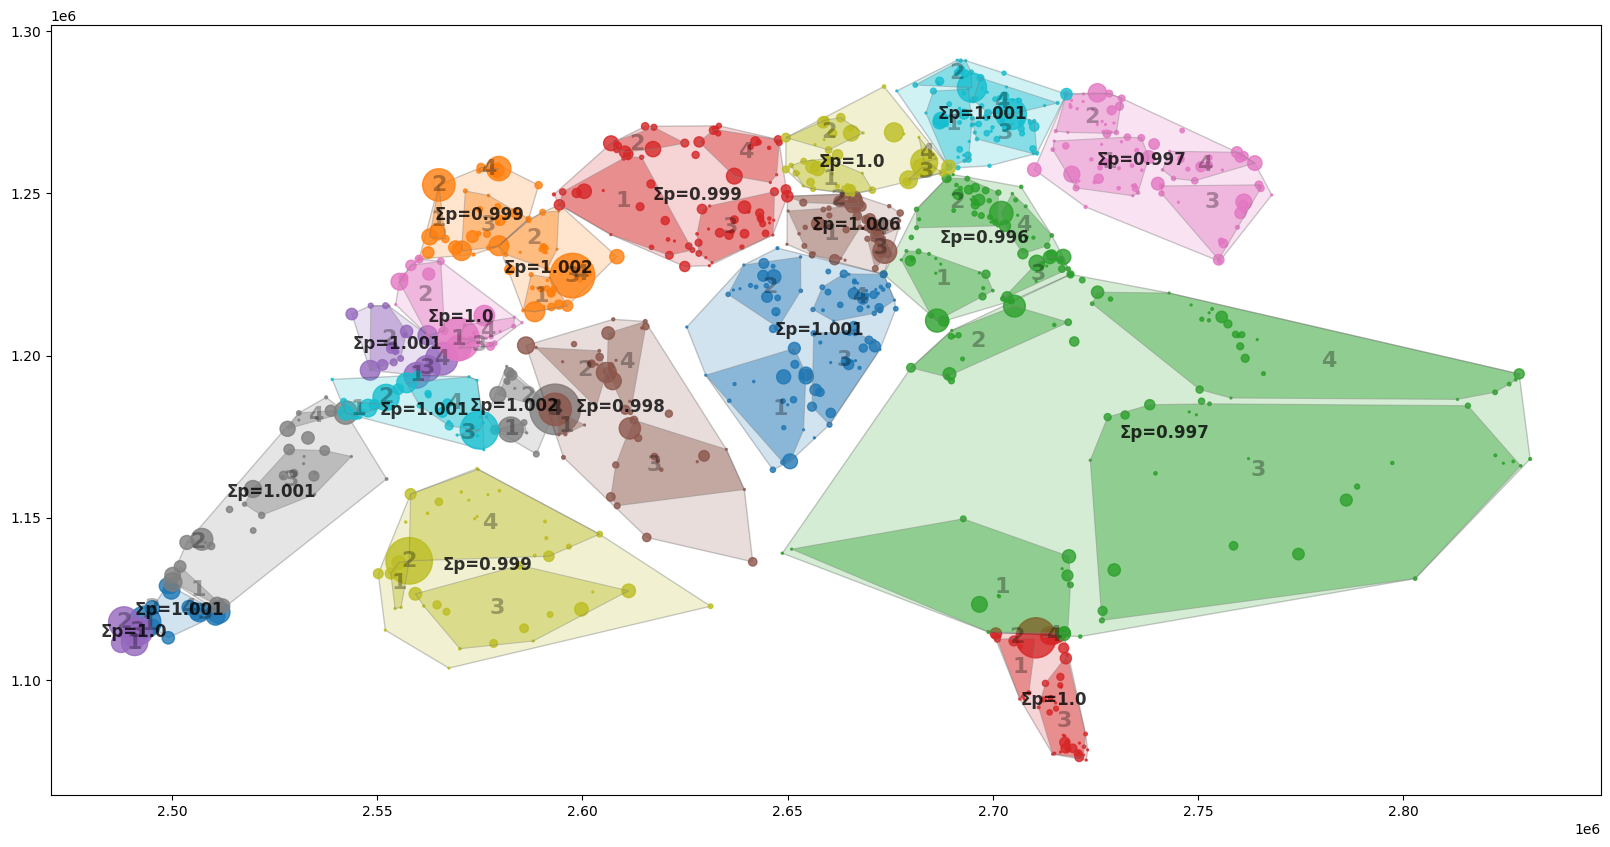

In [9]:
pop_hard.plot(figsize=(20, 10))
